In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from reComBat import reComBat


In [3]:
technology = "microarray" # "RNAseq"
#technology = "RNAseq" #microarray

In [4]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")

metadata =   cts[["Experiment", "Sample", "Age"]]


/tmp/ipykernel_85417/3142307427.py:4: DtypeWarning: Columns (51280) have mixed types. Specify dtype option on import or set low_memory=False.
  cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")


In [5]:
metadata

,Experiment,Sample,Age
0,GSE13070,GSM342608,52.50
1,GSE13070,GSM342609,50.60
2,GSE13070,GSM342610,56.08
3,GSE13070,GSM342611,54.84
4,GSE13070,GSM342614,51.14
...,...,...,...
772,GSE9676,GSM244612,65.10
773,GSE9676,GSM244613,68.40
774,GSE9676,GSM244614,65.90
775,GSE9676,GSM244615,67.30


# Function

In [6]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [7]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,67.30,NaN


In [8]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [9]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE13070',
 'GSE47969',
 'GSE48278',
 'GSE9103',
 'GSE59880',
 'GSE9676',
 'GSE161643',
 'GSE8157',
 'GSE1428',
 'GSE38718',
 'GSE6348',
 'GSE40551',
 'GSE87105',
 'GSE674_2']

In [10]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [11]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,67.30,NaN


In [12]:
cts_processed = cts.copy()
#
if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [19]:
cts_processed

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,168.000000,...,500.200012,878.599976,14.600000,387.500000,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000
GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,191.600006,...,197.699997,672.400024,78.400002,556.799988,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012
GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,65.500000,...,226.300003,433.399994,22.100000,604.400024,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006
GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,127.199997,...,32.299999,572.400024,115.400002,533.099976,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994
GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,145.000000,...,942.200012,904.500000,9.400000,580.799988,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,2498.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,1764.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,2197.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
#!pip install combat

In [20]:
experiment_order= pd.Series(experiment_order)


In [21]:
combat = reComBat()
combat.fit(cts_processed,experiment_order)
reCombat_adjusted = combat.transform(cts_processed,experiment_order)

[reComBat] 2024-04-17 13:15:11,603 Starting to fot reComBat.
[reComBat] 2024-04-17 13:15:11,640 Fit the linear model.
[reComBat] 2024-04-17 13:15:13,734 Starting the empirical parametric optimisation.
/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/reComBat-main/reComBat/utils.py:83: RuntimeWarning: divide by zero encountered in divide
  np.max(np.abs(delta_star_squared_new_i-delta_star_squared_i)/delta_star_squared_i)])
[reComBat] 2024-04-17 13:15:15,157 Optimisation finished.
[reComBat] 2024-04-17 13:15:15,158 reComBat is fitted.
[reComBat] 2024-04-17 13:15:15,159 Starting to transform.
[reComBat] 2024-04-17 13:15:15,939 Transform finished.


In [22]:
reCombat_adjusted.index



Index(['GSM342608', 'GSM342609', 'GSM342610', 'GSM342611', 'GSM342614',
       'GSM342615', 'GSM342616', 'GSM342617', 'GSM342620', 'GSM342621',
       ...
       'GSM244607', 'GSM244608', 'GSM244609', 'GSM244610', 'GSM244611',
       'GSM244612', 'GSM244613', 'GSM244614', 'GSM244615', 'GSM244616'],
      dtype='object', name='Sample', length=777)

In [23]:
metadata.columns

Index(['Experiment', 'Sample', 'Age'], dtype='object')

In [28]:
data= cts_processed.T

In [29]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

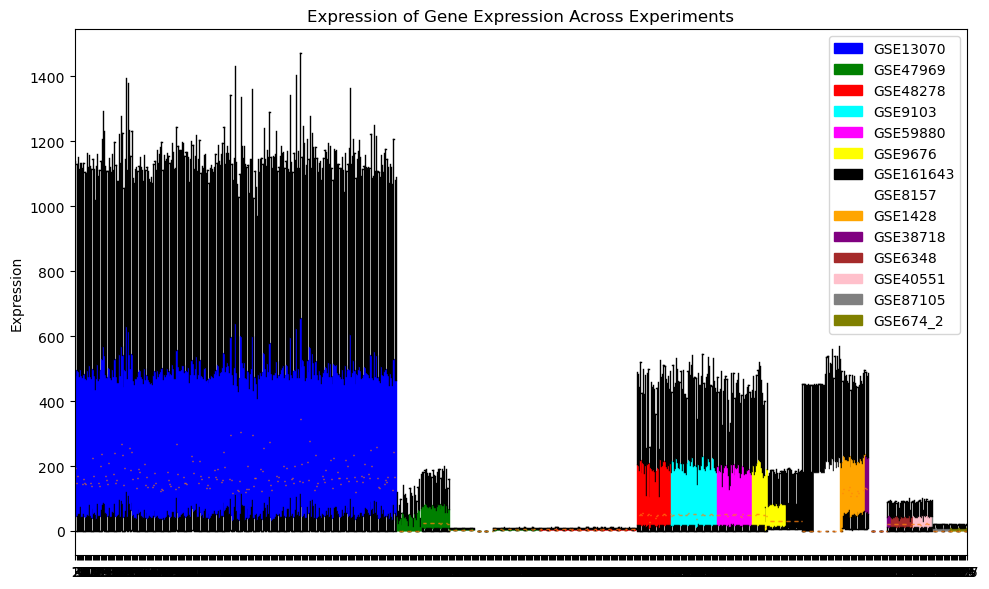

In [30]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_unalteraded_reCombat.png")



In [31]:
data_corrected = reCombat_adjusted

In [32]:
data_corrected

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-2062.743118,95.181598,-260.017414,-62.975012,67.009168,-423.939389,-89.718495,-196.868598,13.395788,154.876449,...,227.333874,307.909490,-15.282261,-83.719018,95.061061,-22.251511,24.896242,10.005967,-99.392807,-138.024835
GSM342609,1158.799134,-541.411223,339.972750,-516.692416,352.628769,974.639448,-53.923412,-71.196158,-250.131450,309.329607,...,-79.995523,22.256447,32.422345,137.120880,36.031117,1845.385001,-1.875119,-15.161074,-102.248917,74.737938
GSM342610,-1488.957251,-586.176092,-31.580805,35.994379,499.977686,1109.234831,-519.948121,-315.027996,-202.649064,-515.947474,...,-50.938921,-308.835222,-9.674353,199.211772,1.293327,-455.789644,79.561639,42.497744,-49.859692,97.260751
GSM342611,-608.478027,70.764445,-290.292106,-1776.732646,-272.382342,-430.517458,-73.886024,-433.187408,-102.540376,-112.144216,...,-248.036114,-116.275615,60.088025,106.205885,-29.922070,-286.293610,17.901146,-25.396925,-79.400038,217.382449
GSM342614,-2260.745565,450.394614,706.709892,1278.896905,164.077939,323.925805,-413.939584,-157.254468,46.633432,4.350105,...,676.390358,343.789327,-19.170412,168.427188,-47.169515,-76.459797,60.217176,28.975153,49.043297,94.852633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,2406.099299,701.108201,-1511.249588,1053.347813,1063.794543,1999.797718,4134.643295,3646.460018,-540.334718,2178.328920,...,57.641231,118.137475,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969
GSM244613,-2452.532495,-2303.183241,-6452.190043,-3239.090434,180.763818,-422.587745,-7201.027058,-359.355911,-360.395781,-215.604406,...,57.641231,118.137475,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969
GSM244614,3331.993545,-617.837803,-1575.834487,1153.877996,2557.323530,216.936671,-1722.457066,1878.259639,-184.111785,1195.877964,...,57.641231,118.137475,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969


In [34]:
data_corrected = data_corrected.T

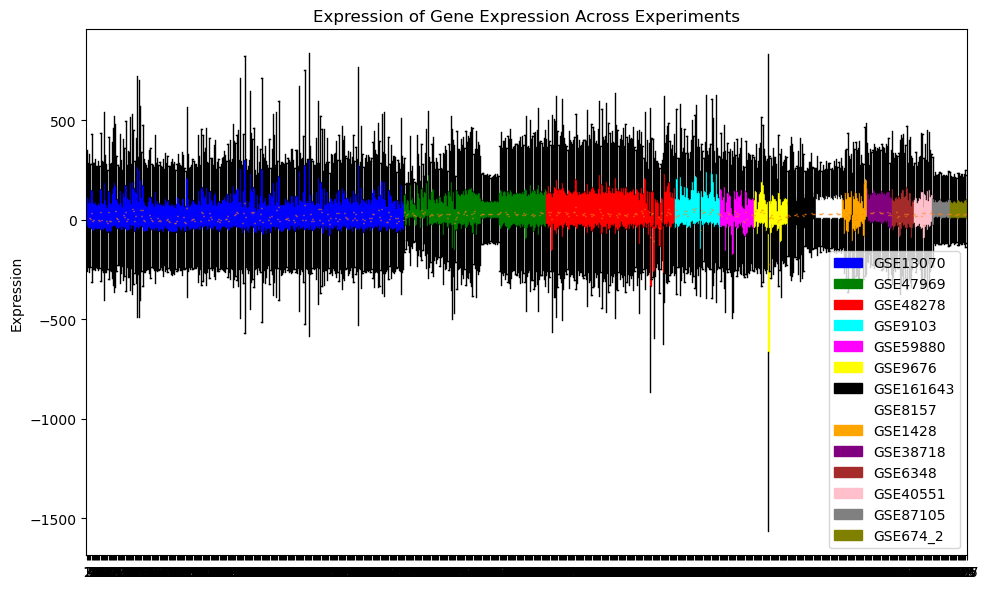

In [35]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_adjusted_reCombat.png")

In [53]:
data_corrected = data_corrected.T


In [ ]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

# Testing batch correction

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [37]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [38]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [39]:
experiment_list = experiments
experiments

['GSE13070',
 'GSE47969',
 'GSE48278',
 'GSE9103',
 'GSE59880',
 'GSE9676',
 'GSE161643',
 'GSE8157',
 'GSE1428',
 'GSE38718',
 'GSE6348',
 'GSE40551',
 'GSE87105',
 'GSE674_2']

In [40]:
experiment_1 = experiments[0]
experiment_2 = experiments[1]

In [45]:
# Perform differential expression analysis after batch correction



In [46]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [47]:
p_values_before

array([2.28308722e-123, 7.41678516e-181, 3.74713097e-039, ...,
       1.19067823e-033, 2.00162766e-041, 1.41421412e-141])

In [48]:
p_values_after

array([0.97667316, 0.97415529, 0.91570597, ..., 0.980168  , 0.9909252 ,
       0.95221535])

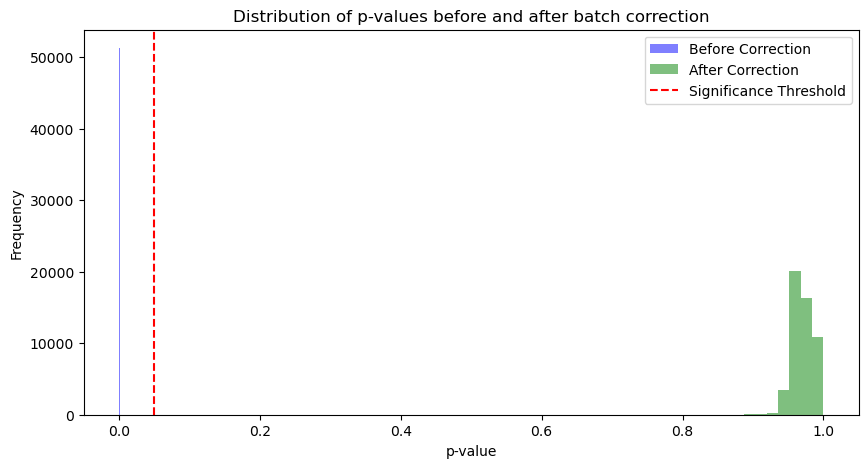

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 51275
Number of significant p-values after correction: 0


In [49]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [50]:
p_values_after

array([0.97667316, 0.97415529, 0.91570597, ..., 0.980168  , 0.9909252 ,
       0.95221535])

## Getting all the experiments p_values


In [51]:
import itertools


In [54]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    combination_list.append(f"{experiment_1}-{experiment_2}")
    p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



/home/karen/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/karen/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/karen/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/karen/anaconda3/lib/python3.11/site-packages/scipy/stat

In [55]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [56]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

,combination,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after
0,GSE13070-GSE47969,0.000004,0.000388,0.970202,0.016924
1,GSE13070-GSE48278,0.010179,0.076679,0.959603,0.063431
2,GSE13070-GSE9103,0.010163,0.073320,0.948389,0.090184
3,GSE13070-GSE59880,0.018867,0.099228,0.956142,0.084886
4,GSE13070-GSE9676,0.008405,0.069197,0.955067,0.119891
...,...,...,...,...,...
86,GSE6348-GSE87105,NaN,NaN,0.829339,0.342483
87,GSE6348-GSE674_2,NaN,NaN,0.390630,0.448113
88,GSE40551-GSE87105,NaN,NaN,0.860039,0.344922
89,GSE40551-GSE674_2,NaN,NaN,0.431151,0.460601


In [58]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_recombat.csv")

Heatmap the similarity of the experiments

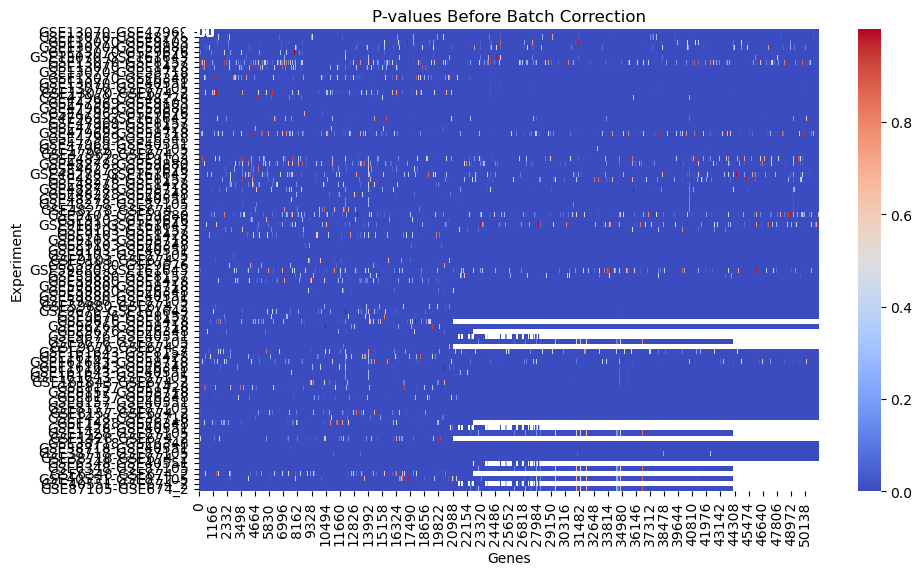

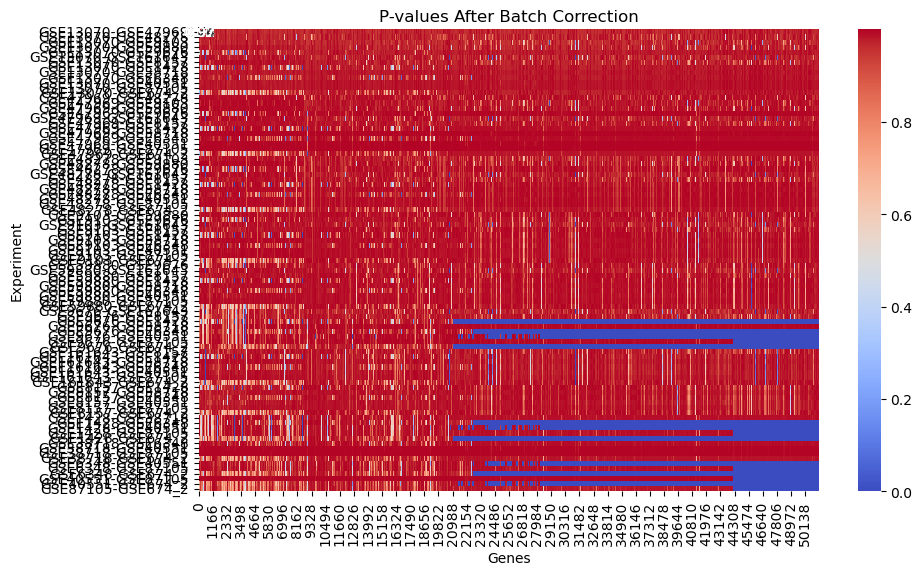

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_before.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_after.png")
plt.show()

DE only in one experiment

In [ ]:
import pandas as pd
experiment=experiment_1

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [ ]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

In [ ]:
if technology =="RNAseq":
    len(columns_to_keep)

In [ ]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [ ]:
#p_values_after[x]

In [ ]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
if technology =="RNAseq":
    DE_data_corrected

In [ ]:
if technology =="RNAseq":
    DE_data

In [ ]:
if technology =="RNAseq":
    DE_data.columns

In [ ]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


In [ ]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

In [ ]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [ ]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [ ]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [60]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
GSM342608,GSE13070,MiddleAge
GSM342609,GSE13070,MiddleAge
GSM342610,GSE13070,MiddleAge
GSM342611,GSE13070,MiddleAge
GSM342614,GSE13070,MiddleAge
...,...,...
GSM244612,GSE9676,Old
GSM244613,GSE9676,Old
GSM244614,GSE9676,Old


In [61]:
data_corrected.index = cts["Sample"]
cts_processed.index = cts["Sample"]

In [62]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [63]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [64]:
adjuested_data_full.columns[10:]

Index([          10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
       ...
              51268,        51269,        51270,        51271,        51272,
              51273,        51274,        51275, 'Experiment',        'Age'],
      dtype='object', length=51268)

In [65]:
cts_2 = cts.set_index("Sample")
cts_2

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,168.000000,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,191.600006,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,65.500000,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,127.199997,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,145.000000,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,2498.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,1764.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,2197.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN


In [66]:
adjuested_data_full["Age"]=cts_2["Age"]
adjuested_data_full

,0,1,2,3,4,5,6,7,8,9,...,51268,51269,51270,51271,51272,51273,51274,51275,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-2062.743118,95.181598,-260.017414,-62.975012,67.009168,-423.939389,-89.718495,-196.868598,13.395788,154.876449,...,-15.282261,-83.719018,95.061061,-22.251511,24.896242,10.005967,-99.392807,-138.024835,GSE13070,52.50
GSM342609,1158.799134,-541.411223,339.972750,-516.692416,352.628769,974.639448,-53.923412,-71.196158,-250.131450,309.329607,...,32.422345,137.120880,36.031117,1845.385001,-1.875119,-15.161074,-102.248917,74.737938,GSE13070,50.60
GSM342610,-1488.957251,-586.176092,-31.580805,35.994379,499.977686,1109.234831,-519.948121,-315.027996,-202.649064,-515.947474,...,-9.674353,199.211772,1.293327,-455.789644,79.561639,42.497744,-49.859692,97.260751,GSE13070,56.08
GSM342611,-608.478027,70.764445,-290.292106,-1776.732646,-272.382342,-430.517458,-73.886024,-433.187408,-102.540376,-112.144216,...,60.088025,106.205885,-29.922070,-286.293610,17.901146,-25.396925,-79.400038,217.382449,GSE13070,54.84
GSM342614,-2260.745565,450.394614,706.709892,1278.896905,164.077939,323.925805,-413.939584,-157.254468,46.633432,4.350105,...,-19.170412,168.427188,-47.169515,-76.459797,60.217176,28.975153,49.043297,94.852633,GSE13070,51.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,2406.099299,701.108201,-1511.249588,1053.347813,1063.794543,1999.797718,4134.643295,3646.460018,-540.334718,2178.328920,...,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969,GSE9676,65.10
GSM244613,-2452.532495,-2303.183241,-6452.190043,-3239.090434,180.763818,-422.587745,-7201.027058,-359.355911,-360.395781,-215.604406,...,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969,GSE9676,68.40
GSM244614,3331.993545,-617.837803,-1575.834487,1153.877996,2557.323530,216.936671,-1722.457066,1878.259639,-184.111785,1195.877964,...,6.420098,83.892239,49.460921,427.395391,14.097092,11.147196,58.772322,57.393969,GSE9676,65.90


In [67]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_recombat.csv")

In [68]:
unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2_recombat.csv")

Looking at reCombat plotting

In [69]:
X = data_corrected.fillna(0, inplace=False).values 

In [70]:
X

array([[-2062.74311758,    95.1815976 ,  -260.01741399, ...,
           10.00596739,   -99.39280723,  -138.02483458],
       [ 1158.79913406,  -541.41122333,   339.97275002, ...,
          -15.16107415,  -102.24891708,    74.73793775],
       [-1488.95725056,  -586.17609156,   -31.58080512, ...,
           42.49774438,   -49.85969221,    97.26075072],
       ...,
       [ 3331.99354485,  -617.83780286, -1575.83448676, ...,
           11.14719617,    58.77232215,    57.39396866],
       [ 4938.4513187 ,  -626.29647782, -2498.61568954, ...,
           11.14719617,    58.77232215,    57.39396866],
       [ -220.9953884 ,  -751.26797807, -1747.08232397, ...,
           11.14719617,    58.77232215,    57.39396866]])

In [71]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


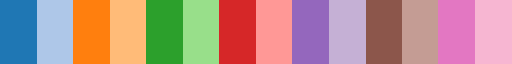

In [72]:
custom_cmap

Using tSNE


In [73]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

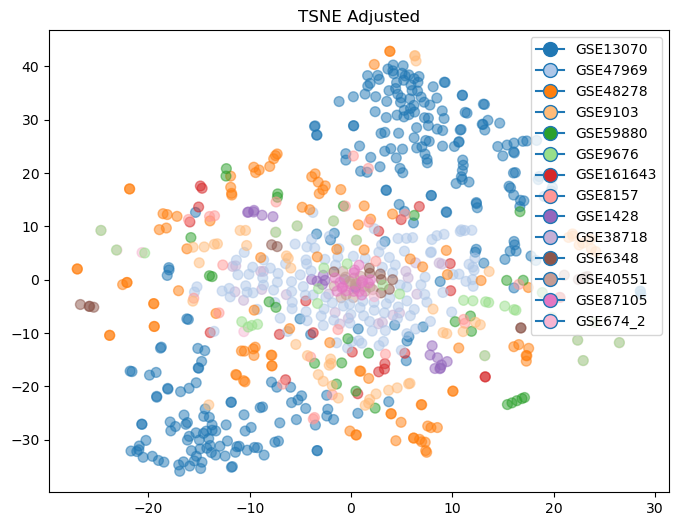

In [74]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment.png"
plt.savefig(save)

Using PCA

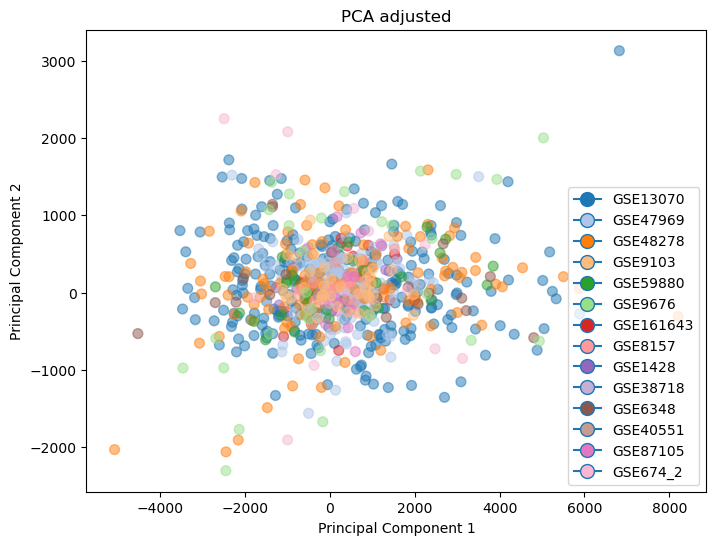

In [75]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment.png"
plt.savefig(save)

Lookign at the age

In [76]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [77]:
pd.DataFrame(age_order).value_counts()

MiddleAge    571
Young        128
Old           78
Name: count, dtype: int64

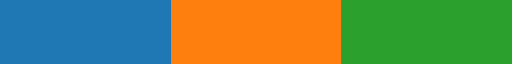

In [78]:
custom_cmap

tSNE

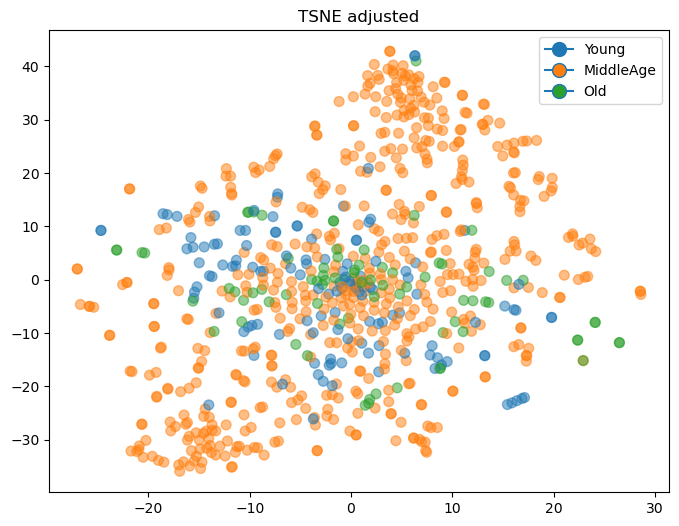

In [79]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

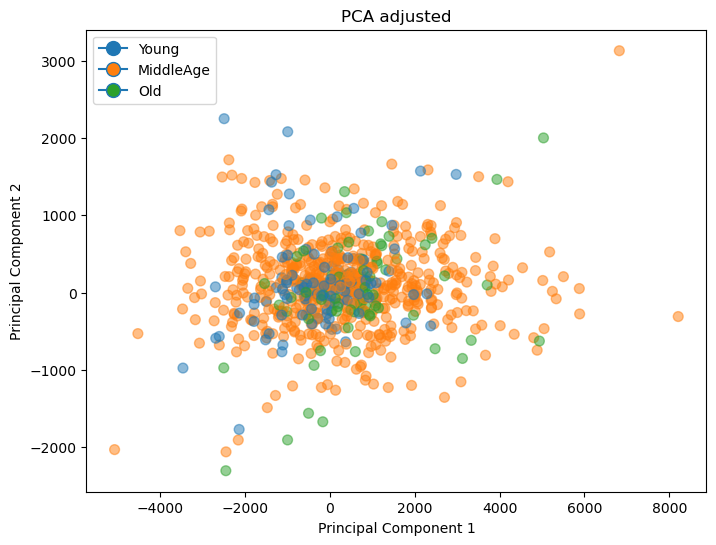

In [80]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

# Unadjusted

In [ ]:
X = cts_processed.values 


tSNE by experiment

In [ ]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [ ]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [ ]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

In [ ]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP